## Predicting Price of second-hand car

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

# To remove scientific notation from numpy arrays
np.set_printoptions(suppress=True)

#### Dataset

In [11]:
df=pd.read_pickle('../Datasets/CarPricesData.pkl')
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB


In [13]:
df.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

**Columns**: ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price']

- Target: ['Price']

- Predictors: ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

#### Splitting the Data into Training and Testing


Separating Target Variable and Predictor Variables

In [16]:
TargetVariable = ['Price']
Predictors = ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

In [20]:
X = df[Predictors].values
y = df[TargetVariable].values

Standardization of the data

In [21]:
from sklearn.preprocessing import StandardScaler

PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

Storing the fit object for later reference

In [25]:
PredictorScalarFit = PredictorScaler.fit(X)
TargetVarScalerFit = TargetVarScaler.fit(y)

Generating the standardized values of X and y

In [ ]:
X = PredictorScalarFit.transform(X)
y = TargetVarScalerFit.transform(y)

Split the data into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Quick sanity check with the shapes of Training and testing datasets

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


Downloading libraries, `tensorflow` and `keras`

In [34]:
!pip install tensorflow keras 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Creating Deep Learning- Artificial Neural Networks(ANN) model

- Using **2 hidden layers** and five neurons each and one output layer with one neuron.

- Tuning LLM : Choosing the combinations that produces the best possible accuracy.

`Sequential` module from **Keras** library:
- Used to create a sequence of ANN layers stacked one after the other.
- Each layer is defined using the "**Dense**" module of keras where we specify,
    - number of neurons there would be
    - technique be used to initialize the weights in the network
    - activation function for each neuron in that layer etc.

Hyperparameters:

- `units = 5`
    - Creates a layer with five neurons in it
    - Each of 5 neurons receiving the values of the inputs

- `input_dim = 7`
    - As there are 7 predictors in the input data which is expected by the first layer
    - Note: same is not applied for 2nd dense layer, as Sequential model passes this info to the next layers.

- `kernel_initializer = 'normal'`
    - When Neurons start their computation, some algo has to decide the value for each weight and is specified by this parameter
    - Different values like 'normal' or 'glorot_uniform' can be used

- `activation = 'relu'`
    - Specifies activation function for calculations inside each neuron
    - depends on the type of classification to performed, e.g. binomial, multiclass
    - e.g, 'relu', 'tanh', 'sigmoid'

- `batch_size=20`
    - Specifies how many rows will be passed to Network in one go after which )Sum of squared errors (SSE) calculation will begin and the neural network will start adjusting its wreights based on the errors.
    - **1-epoch:** When all rows are passed in the batches of 20 rows each as specified in this parameters, or basically one full cycle.
    - Known as **Mini batch gradient descent**: A small value of batch_Size will make the ANN look at the data slowly, 
    - like 2 rows at a time or 4 rows at a time, leading to *overfitting*, 
    - or a large value like 20 or 50 rows at a time, making ANN look at the data fast leading to *underfitting*.
    - Hence a proper value must be chosen using hyperparameter tuning

- `Epochs = 50`
    - Same activity of adjusting weights continues for 50 times, as specified by this parameter.
    - Thus ANN looks at the full training data 50 times and adjusts its weights.

In [ ]:
# importing the libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creates ANN model
model = Sequential()

# Define the Input layer and 1st hidden layer
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the 2nd layer of the model,
## after 1st layer, we don't have to specify the input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# Output neuron is a singly fully connected node
# Since we are predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the training set
model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0285  
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0267
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6551
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6249
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3306
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2382
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1647
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1529
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1433
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1246
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1399
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1346
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1096
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1243
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1081
Epoch 16/50
51/51

#### Hyperparameter tuning of ANN

- Finding the best values for **batch_size** and **epoch** is very important as it directly affects the model performance, as it can lead to underfitting or overfitting with wrong values
- We can also choose to tune the number of neurons, the optimal numbers of layers.
- Have to try different parameters and choose the combinations producing the highest accuracy

- Note: Bigger the network, more computationally intensive it is, hence would take more time to run, thus finding best accuracy with minimum number of layers/neurons is essential


#### Finding best set of parameters using manual grid search

In [63]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            new_row = pd.DataFrame([[TrialNumber, f"{batch_size_trial}-{epochs_trial}", 100 - MAPE]], 
                       columns=['TrialNumber', 'Parameters', 'Accuracy'])
            SearchResultsData = pd.concat([SearchResultsData, new_row], ignore_index=True)

    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 37.49123519705037
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 40.21081691735444
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 53.59448755881133
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 54.86768327996911
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 31.94087326277129
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 44.70511057664299
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 54.56313408017645
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 54.906806469464186
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 44.734745692932336
14/14 ━━━━━━━

Plotting the parameter trial results

<Axes: xlabel='Parameters'>

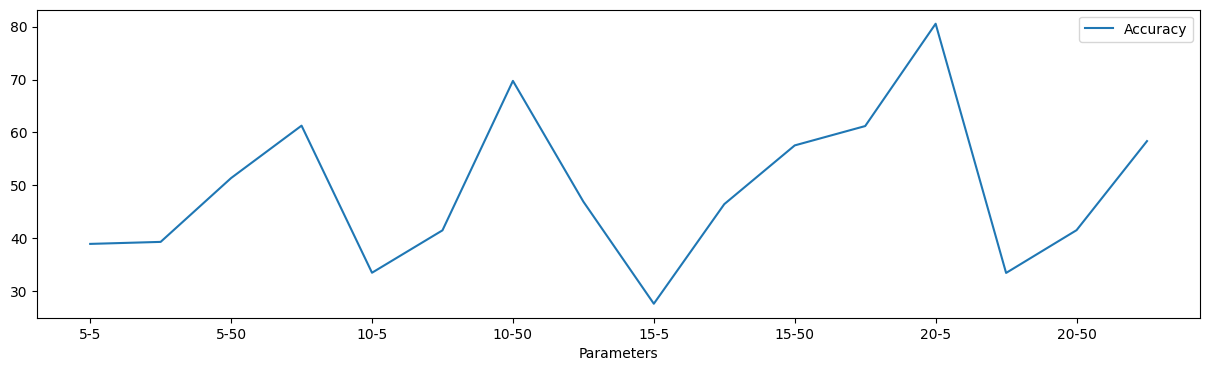

In [46]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

- Visualizing the results of parameter trials for ANN
- Graph shows that the best set of parameters are batch_size=20 and epochs=5. Next step is to train the model with these parameters.

### Training the ANN model with the best parameters

In [58]:
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalarFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,0.160463,0.316405,-0.139704,0.568103,0.694578,0.178171,-1.084443,9950.0,9768.479492
1,0.322394,-0.100720,0.070064,0.568103,0.694578,0.178171,1.015659,7995.0,9928.155273
2,0.160463,1.639046,1.328667,-1.969259,0.694578,2.320622,-0.034392,7500.0,8769.508789
3,0.700231,-0.687650,-0.454354,0.568103,0.694578,0.178171,-1.084443,9950.0,9230.137695
4,0.484324,-0.575211,-1.188540,-1.034441,0.694578,-1.428668,-1.084443,8950.0,8931.541016


### Finding the accuracy of the model

- Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE).

- The accuracy is calculated as 100-MAPE.

In [59]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.07824045907914


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,0.160463,0.316405,-0.139704,0.568103,0.694578,0.178171,-1.084443,9950.0,9768.479492,1.824327
1,0.322394,-0.100720,0.070064,0.568103,0.694578,0.178171,1.015659,7995.0,9928.155273,24.179553
2,0.160463,1.639046,1.328667,-1.969259,0.694578,2.320622,-0.034392,7500.0,8769.508789,16.926784
3,0.700231,-0.687650,-0.454354,0.568103,0.694578,0.178171,-1.084443,9950.0,9230.137695,7.234797
4,0.484324,-0.575211,-1.188540,-1.034441,0.694578,-1.428668,-1.084443,8950.0,8931.541016,0.206246


### Accuracy if different in every training of the ANN,

- Even for the same hyperparameters, results will be slightly different for each run of the ANN.
- Happens as initial step for ANN is the random initialization of weights
- This everytime running this code, there are different values that get assigned to each neuron as weights and bias, hence final outcome also differs sightly.

In [69]:
!pip install scikeras


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**RandomizedSearchCV**,
- Works by sampling random combinations of hyperparameters from the search space and evaluating them using cross-validation. 
- It continues sampling and evaluating until it has tried the specified number of iterations. 
- Thus it does not explore the entire search space, but rather a randomly selected subset of it. 
- This can be more efficient than GridSearchCV, which explores the entire search space, but it may also be less likely to find the true optimal set of hyperparameters.

**GridSearchCV**,
- Exhaustively searches the entire search space by trying every possible combination of hyperparameters. 
- Can be very computationally expensive, especially if the search space is large or if the model takes a long time to fit. 
- However, it is guaranteed to find the optimal set of hyperparameters if it is able to complete the search.

#### Finding best hyperparameters using GridSearchCV

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time@@@@@###########esfdgfdsdfwsedsfgvdswqefgtfdewqedfrgqwrfdedaws

In [ ]:
# Function to generate Deep ANN model
def make_regression_ann(optimizer='adam'):
    model = Sequential([
        Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'),
        Dense(units=5, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal')
    ])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define search space for GridSearchCV
Parameter_Trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

# Wrap model for use in GridSearchCV
RegModel = KerasRegressor(build_fn=make_regression_ann, verbose=0)

# Custom scoring function
def Accuracy_Score(orig, pred):
    orig, pred = np.array(orig), np.array(pred)
    MAPE = np.mean(np.abs(orig - pred) / (orig + 1e-8)) * 100  # Prevent division by zero
    return 100 - MAPE  # Higher score means better accuracy

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=RegModel,
    param_grid=Parameter_Trials,
    scoring=custom_Scoring,
    cv=5
)

# Generate Sample Data
X = np.random.rand(100, 7)  # 100 samples, 7 features
y = np.random.rand(100, 1).ravel()  # 100 target values

# Run Grid Search
StartTime = time.time()
grid_search.fit(X, y)
EndTime = time.time()

# Results
print("########## Total Time Taken: ", round((EndTime - StartTime) / 60), 'Minutes')
print('### Best Parameters ###', grid_search.best_params_)

########## Total Time Taken:  1 Minutes
### Best Parameters ### {'batch_size': 30, 'epochs': 10, 'optimizer': 'adam'}


**Conclusion:**

- Deep Learning ANN regression model can be used to fit on any given dataset
- Deep ANNs work great when you have a good amount of data available for learning. For small datasets with less than 50K records, supervised ML models like Random Forests, Adaboosts, XGBoosts, etc are recommended.
- The simple reason behind this is the high complexity and large computations of ANN. It is not worth it, we can achieve the same accuracy with a faster and simpler model.
- Deep learning ANNs should be only used when having a large amount of data available and the other algorithms are failing or do not fit for the task.
